In [1]:
!pip install geos

!pip install pyproj

     |████████████████████████████████| 409kB 5.7MB/s 
     |████████████████████████████████| 6.5MB 4.5MB/s 


In [2]:
!apt-get install -q libgeos-3.5.0

!apt-get install -q libgeos-dev

!pip install -q https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists...
Building dependency tree...
Reading state information...
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists...
Building dependency tree...
Reading state information...
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 10 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (165 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 146442 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1build2) ...
Processing trigge

In [3]:
!pip install -q pyproj==1.9.6

     |████████████████████████████████| 2.8MB 4.2MB/s 


In [5]:
#載入氣象資訊檔, 提供解讀檔案資訊
!pip install netCDF4

     |████████████████████████████████| 4.7MB 5.7MB/s 
     |████████████████████████████████| 317kB 29.9MB/s 


odict_keys(['ETOPO05_X', 'ETOPO05_Y', 'ROSE'])


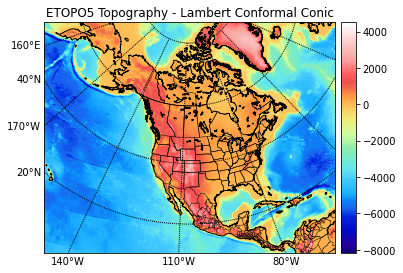

In [6]:
from mpl_toolkits.basemap import Basemap, shiftgrid, cm
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset

# 讀入 etopo5 地形/降水量。.
#url = 'https://github.com/NOAA-PMEL/FerretDatasets/blob/master/data/etopo5.cdf'
#etopodata = Dataset(url)
# 要確認資料集所在路徑
etopodata = Dataset('/content/drive/MyDrive/Colab Notebooks/etopo5.cdf')

# 取得資料集裡的資料定義, 使用variables.keys()
print(etopodata.variables.keys())
# 匯入資料
topoin = etopodata.variables['ROSE'][:]
lons = etopodata.variables['ETOPO05_X'][:]
lats = etopodata.variables['ETOPO05_Y'][:]

# 移位資料, 使 lon 從 - 180 到 180, 而不是 20 到 380 
topoin,lons = shiftgrid(180,topoin,lons,start=False)

# 繪製地形/降水量
# 創建圖形和軸實例
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])

#設定地理資訊圖('lcc' = lambert conformal conic).
# 使用 Wgs84 橢圓體的主要和次要球體半徑, 做基礎的底圖
# 請填入 resolution='??',area_thresh=???.,projection='??'
m = Basemap(llcrnrlon=-145.5,llcrnrlat=1.,urcrnrlon=-2.566,urcrnrlat=46.352,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',area_thresh=1000.,projection='lcc',\
            lat_1=50.,lon_0=-107.,ax=ax)
# 轉換為 nx x ny 定期分空 5km 本機投影網格
nx = int((m.xmax-m.xmin)/5000.)+1; ny = int((m.ymax-m.ymin)/5000.)+1
topodat = m.transform_scalar(topoin,lons,lats,nx,ny)
# plot image over map with imshow.
im = m.imshow(topodat,cm.GMT_haxby)
#劃定海岸線和邊境界限, 總共需要3個參數
m.drawcoastlines()
m.drawcountries()
m.drawstates()

# 繪製經緯線
# 設定地圖左側和底部的標籤
parallels = np.arange(0.,80,20.)
m.drawparallels(parallels,labels=[1,0,0,1])
meridians = np.arange(10.,360.,30.)
m.drawmeridians(meridians, labels=[1,0,0,1])


# 加入 colorbar
cb = m.colorbar(im,"right", size="5%", pad='2%')
ax.set_title('ETOPO5 Topography - Lambert Conformal Conic')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


warp to orthographic map ...


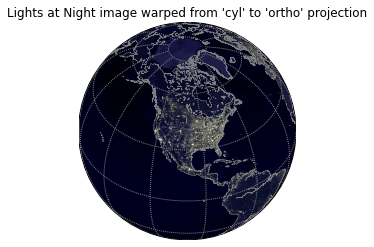

In [8]:
from __future__ import (absolute_import, division, print_function)

from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

# 說明使用warpimage method 方法顯示圖像背景。
# 在地圖投影區域。 預設背景是『藍色。
#來自美國宇航局的大理石圖像 (http://visibleearth.nasa.gov)

# 建立新圖像
fig=plt.figure()
# 定義以北美為中心的正交投影.
m = Basemap(projection='ortho',lat_0=40,lon_0=-100,resolution='l')
# 顯示非預設影像 - 匯入要使用的IMAGE
m.warpimage(image='/content/drive/MyDrive/Colab Notebooks/earth_lights_lrg.jpg') 
# 繪製海岸線。
m.drawcoastlines(linewidth=0.5,color='0.5')
# 每 30 度繪製一組 lat/lon 網格線。
m.drawmeridians(np.arange(0,360,30),color='0.5')
m.drawparallels(np.arange(-90,90,30),color='0.5')
#添加圖示標題
plt.title("Lights at Night image warped from 'cyl' to 'ortho' projection",fontsize=12)
print('warp to orthographic map ...')

plot native cylindrical map (no warping needed) ...


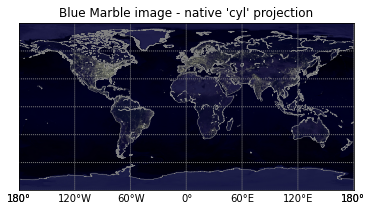

In [12]:
# 建立新圖像
fig=plt.figure()

#新定義圓柱形等距投影。
m = Basemap(projection='cyl',llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,resolution='l')
# 繪圖 (未扭曲) rgba 圖像
im = m.bluemarble(scale=0.5)
m.warpimage(image='/content/drive/MyDrive/Colab Notebooks/earth_lights_lrg.jpg')
# 繪製海岸線。
m.drawcoastlines(linewidth=0.5,color='0.5')
# 繪製經緯度網格
m.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1],color='0.5')
m.drawparallels(np.arange(-90,90,30),label=[1,0,0,0],color='0.5')

# 輸出圖像標題
plt.title("Blue Marble image - native 'cyl' projection",fontsize=12)
print('plot native cylindrical map (no warping needed) ...')

plt.show()